# Explore vorticity@850hPa data

In [2]:
%reload_ext autoreload

%autoreload 2

import math
import os

import iris
import iris.analysis.cartography
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr

import ml_downscaling_emulator as mlde
from ml_downscaling_emulator.utils import cp_model_rotated_pole, platecarree, plot_grid

In [4]:
VARIABLE="vorticity850"
DOMAIN="london"
FREQUENCY="day"

def open_ds(resolution):
    ds_meta = mlde.UKCPDatasetMetadata(os.getenv("MOOSE_DERIVED_DATA"), resolution=resolution, variable=VARIABLE, frequency=FREQUENCY, domain=DOMAIN)
    ds = xr.open_mfdataset(ds_meta.existing_filepaths())
    return ds

In [5]:
target_pr_ds_meta = mlde.UKCPDatasetMetadata(os.getenv("MOOSE_DERIVED_DATA"), resolution="2.2km-2.2km", variable="pr", frequency=FREQUENCY, domain=DOMAIN)
target_pr_ds = xr.open_mfdataset(target_pr_ds_meta.existing_filepaths())
target_pr_ds

<xarray.Dataset>
Dimensions:                     (time: 1080, bnds: 2, grid_latitude: 64,
                                 grid_longitude: 64)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 2061-11...
  * grid_latitude               (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
    forecast_period             (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time     (time) object 1979-09-01 00:00:00 ... 2059-09...
    realization                 int32 1100000
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    time_bnds                   (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    grid_latitude_bnds          (time, grid_latitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    grid_longitude_bnds         (time, grid_longitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    forecast_period_bnds        (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    pr                          (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

## GCM-derived

## GCM 60km regriddded (NN) to CPM 2.2km

In [8]:
gcm_ds = open_ds("60km-2.2km")
gcm_ds

<xarray.Dataset>
Dimensions:                     (time: 1080, grid_latitude: 64,
                                 grid_longitude: 64, bnds: 2)
Coordinates:
    pressure                    float32 850.0
    forecast_period             (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time     object 1896-12-01 00:00:00
    realization                 int32 1100000
  * time                        (time) object 1980-12-01 12:00:00 ... 2061-11...
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
  * grid_latitude               (grid_latitude) float32 -1.58 -1.56 ... -0.32
Dimensions without coordinates: bnds
Data variables:
    vorticity850                (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    grid_latitude_bnds          (time, grid_latitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    grid_longitude_bnds         (time, grid_longitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    time_bnds                   (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    forecast_period_bnds        (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.4
    Conventions:  CF-1.7

## CPM-derived

### Uncoarsened 2.2km

In [10]:
uncoarsened_ds = open_ds("2.2km-2.2km")
uncoarsened_ds

<xarray.Dataset>
Dimensions:                     (time: 1080, bnds: 2, grid_latitude: 64,
                                 grid_longitude: 64)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 2061-11...
    pressure                    float32 850.0
  * grid_latitude               (grid_latitude) float32 -1.59 -1.57 ... -0.33
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
    forecast_period             (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time     (time) object 1979-09-01 00:00:00 ... 2059-09...
    realization                 int32 1100000
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    time_bnds                   (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    grid_latitude_bnds          (time, grid_latitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    grid_longitude_bnds         (time, grid_longitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    forecast_period_bnds        (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    vorticity850                (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

### 27x coarsened

In [11]:
coarsened_27x_ds = open_ds("2.2km-coarsened-27x-2.2km")
coarsened_27x_ds

<xarray.Dataset>
Dimensions:                  (time: 1080, grid_latitude: 64,
                              grid_longitude: 64, bnds: 2)
Coordinates:
    pressure                 float32 850.0
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time  (time) object 1979-09-01 00:00:00 ... 2059-09-01...
    realization              int32 1100000
  * time                     (time) object 1980-12-01 12:00:00 ... 2061-11-30...
  * grid_latitude            (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude           (grid_longitude) float32 360.9 360.9 ... 362.1
Dimensions without coordinates: bnds
Data variables:
    vorticity850             (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
    grid_latitude_bnds       (time, grid_latitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    grid_longitude_bnds      (time, grid_longitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    time_bnds                (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    forecast_period_bnds     (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

### GCM-coarsened

In [12]:
gcm_coarsened_ds = open_ds("2.2km-coarsened-gcm-2.2km")
gcm_coarsened_ds

<xarray.Dataset>
Dimensions:                     (time: 1080, grid_latitude: 64,
                                 grid_longitude: 64, bnds: 2)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 2061-11...
    forecast_reference_time     object 1979-09-01 00:00:00
    realization                 int32 1100000
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
  * grid_latitude               (grid_latitude) float32 -1.58 -1.56 ... -0.32
Dimensions without coordinates: bnds
Data variables:
    vorticity850                (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    grid_latitude_bnds          (time, grid_latitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    grid_longitude_bnds         (time, grid_longitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    time_bnds                   (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.7
    source:       Data from Met Office Unified Model
    um_version:   10.6
    history:      Fri Jul 15 12:07:24 2022: cdo -O -s -f nc -remapcon,/home/u...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

In [13]:
sample_mlset = xr.open_dataset(os.path.join(
    os.getenv("MOOSE_DERIVED_DATA"),
    "nc-datasets", "2.2km-coarsened-gcm-2.2km_london_vorticity850_random-sample", "train.nc"
))
sample_mlset

<xarray.Dataset>
Dimensions:                     (time: 100, bnds: 2, grid_latitude: 64,
                                 grid_longitude: 64)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 1981-04...
  * grid_latitude               (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
    forecast_period             (time) timedelta64[ns] ...
    forecast_reference_time     (time) object ...
    realization                 int32 ...
    pressure                    float32 ...
    season                      (time) int64 ...
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  (time) float64 ...
    time_bnds                   (time, bnds) object ...
    grid_latitude_bnds          (time, grid_latitude, bnds) float32 ...
    grid_longitude_bnds         (time, grid_longitude, bnds) float32 ...
    forecast_period_bnds        (time, bnds) float64 ...
    target_pr                   (time, grid_latitude, grid_longitude) float32 ...
    vorticity850                (time, grid_latitude, grid_longitude) float64 ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

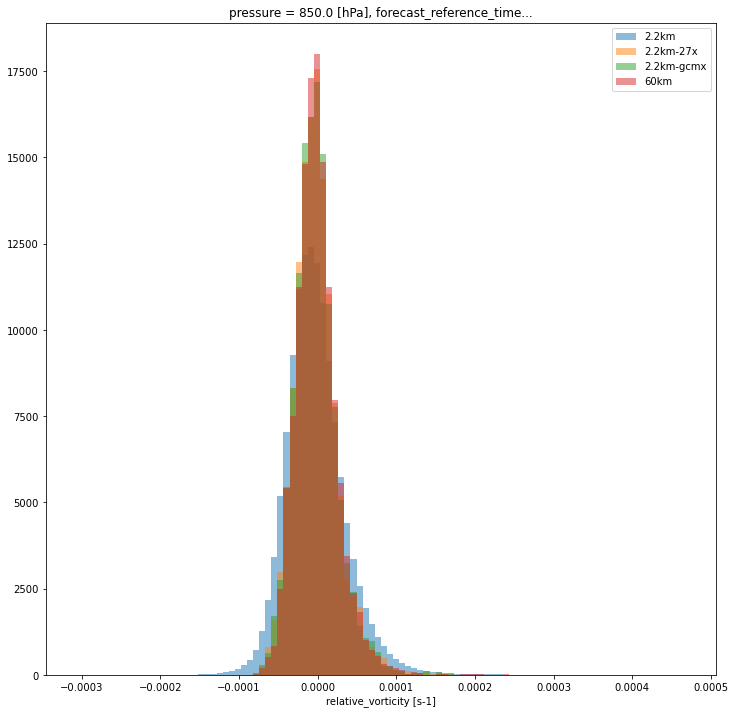

In [14]:
fig, axd = plt.subplot_mosaic([["Hist"]], figsize=(12,12))

ax = axd["Hist"]
bins = 100
_, bins, _   = uncoarsened_ds[VARIABLE].plot.hist(ax=ax, bins=bins, alpha=0.5, density=True, label="2.2km")
coarsened_27x_ds[VARIABLE].plot.hist(ax=ax, bins=bins, alpha=0.5, density=True, label="2.2km-27x")
gcm_coarsened_ds[VARIABLE].plot.hist(ax=ax, bins=bins, alpha=0.5, density=True, label="2.2km-gcmx")
gcm_ds[VARIABLE].plot.hist(ax=ax, bins=bins, alpha=0.5, density=True, label="60km")
ax.legend()

plt.show()